# Displaying molecular orbitals with chemlab and chemview

In [1]:
from chemlab.io import remotefile

df = remotefile('https://raw.githubusercontent.com/cclib/cclib/master/data/GAMESS/basicGAMESS-US2012/water_mp2.out', 'gamess')

molecule = df.read('molecule')
mocoeffs = df.read('mocoeffs')
gbasis = df.read('gbasis')


HDF backend is not available because pytables is not installed


In [2]:
from chemlab.qc import molecular_orbital

coefficients = mocoeffs[0][2]
f = molecular_orbital(molecule.r_array, coefficients, gbasis)
print(f(0, 1, 0))

0.0


In [3]:
from chemview import enable_notebook, MolecularViewer
enable_notebook()

import numpy as np

mv = MolecularViewer(molecule.r_array, { 'atom_types': molecule.type_array })
mv.ball_and_sticks(ball_radius=0.01)
mv.add_isosurface(f, isolevel=0.3, color=0xff0000, resolution=64)
mv.add_isosurface(f, isolevel=-0.3, color=0x0000ff, resolution=64)

mv

:0: FutureWarning: IPython widgets are experimental and may change in the future.
/home/gabriele/anaconda/envs/py2/lib/python2.7/site-packages/IPython/utils/traitlets.py:438: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


In [9]:
import pickle
scene = mv.get_scene()
pickle.dump(scene, open('/tmp/scene.pkl', 'w'))


NameError: name 'render_povray' is not defined

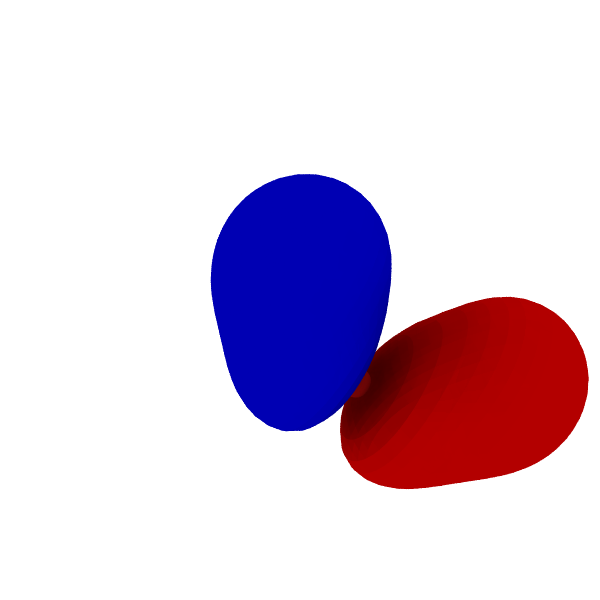

In [4]:
import pickle
from chemview.render import render_povray
scene = pickle.load(open('/tmp/scene.pkl'))
render_povray(scene, extra_opts={'radiosity': True})